# Face API Sample

MS AI School 안면인식 강의를 따라한 코드입니다.

In [111]:
#1. 관련된 라이브러리를 가져옴


import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

In [112]:
#2. subscription key와 서비스의 주소를 설정함


sub_key = "902db9be3f184361972edbf3808b95ae"
face_api_url = "https://dongman-face.cognitiveservices.azure.com/face/v1.0/detect"

In [113]:
#3. 사용할 이미지를 가져옴 (저작권이 없는 이미지를 사용하였습니다)

image_url = 'https://cdn.pixabay.com/photo/2015/11/07/11/01/couple-1030744__340.jpg'

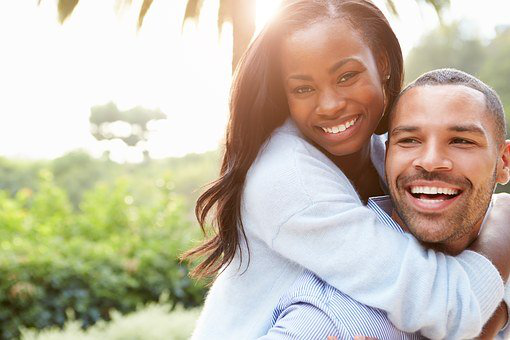

In [114]:
#4. 받아온 이미지 확인

face_image = requests.get(image_url)
img = Image.open(BytesIO(face_image.content))
img #저작권에 문제 없는 이미지를 활용하였음

In [115]:
#5. 헤더정보 셋팅


headers = {'Ocp-Apim-Subscription-Key' : sub_key}

params = {
    'returnFaceId' : 'true',
    'returnFaceLandmarks' : 'false',
    'returnFaceAttributes' : 'age,gender'
}

data = {'url' : image_url}

In [116]:
#6. 서비스 호출 후 결과 확인

response = requests.post(face_api_url, params=params, headers=headers, json=data)
faces = response.json()

In [117]:
faces

[{'faceId': '147dc0c5-0cba-463c-91f2-f885750c9735',
  'faceRectangle': {'top': 105, 'left': 375, 'width': 116, 'height': 116},
  'faceAttributes': {'gender': 'male', 'age': 31.0}},
 {'faceId': '2d856e0c-e0ea-42f7-89ba-4418b36ea6fb',
  'faceRectangle': {'top': 51, 'left': 276, 'width': 111, 'height': 111},
  'faceAttributes': {'gender': 'female', 'age': 24.0}}]

In [118]:
#7. 받아온 결과를 통해 얼굴 주위 사각형과 캡션을 넣자

def CreateImage(faces) :
    for face in faces:
        rect = face['faceRectangle']
        left = rect['left']
        top = rect['top']
        bottom = left + rect['height'] - 18
        right = top + rect['width']
        
        draw.rectangle(((left, top), (bottom, right)), outline = 'red')
        
        fontX = rect['left']
        fontY = rect['top'] - 18
        
        face_info = face['faceAttributes']
        gender = face_info['gender']
        age = face_info['age']
        result = "Gender : " + gender + " Age : " + str(age)

        draw.text((fontX, fontY), result, fill = 'red')

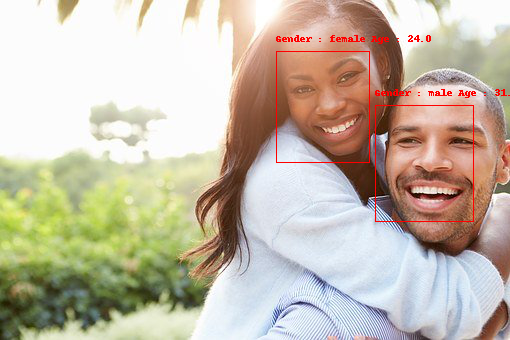

In [119]:
#8. 처리 결과를 출력해보자

draw = ImageDraw.Draw(img)
CreateImage(faces)
img

# + 감정 분석

In [120]:
# FaceAttributes에 emotion을 추가하면 감정 분석까지 가능함

params = {
    'returnFaceId' : 'true',
    'returnFaceLandmarks' : 'false',
    'returnFaceAttributes' : 'emotion'
}

In [121]:
response = requests.post(face_api_url, params=params, headers=headers, json=data)
faces = response.json()

In [122]:
faces

[{'faceId': 'f4b8fa2a-610c-46ac-9ebc-1630db6c7055',
  'faceRectangle': {'top': 105, 'left': 375, 'width': 116, 'height': 116},
  'faceAttributes': {'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}}},
 {'faceId': 'b409fa3c-d8a9-48b8-9500-64de960bdaae',
  'faceRectangle': {'top': 51, 'left': 276, 'width': 111, 'height': 111},
  'faceAttributes': {'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}}}]